<a href="https://colab.research.google.com/github/rahulcheeti/machine-learning/blob/master/hw1prog4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train shape: (60000, 784)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 27us/step - loss: 0.7131 - acc: 0.8301 - val_loss: 0.4489 - val_acc: 0.8860
Epoch 2/30
60000/60000 [==============================] - 1s 20us/step - loss: 0.4312 - acc: 0.8861 - val_loss: 0.3797 - val_acc: 0.8991
Epoch 3/30
60000/60000 [==============================] - 1s 20us/step - loss: 0.3853 - acc: 0.8952 - val_loss: 0.3522 - val_acc: 0.9057
Epoch 4/30
60000/60000 [==============================] - 1s 19us/step - loss: 0.3619 - acc: 0.9001 - val_loss: 0.3366 - val_acc: 0.9086
Epoch 5/30
60000/60000 [==============================] - 1s 19us/step - loss: 0.3471 - acc: 0.9039 - val_loss: 0.3247 - val_acc: 0.9118
Epoch 6/30
60000/60000 [==============================] - 1s 19us/step - loss: 0.3365 - acc: 0.9061 - val_loss: 0.3164 - val_acc: 0.9136
Epoch 7/30
60000/60000 [==============================] - 1s 

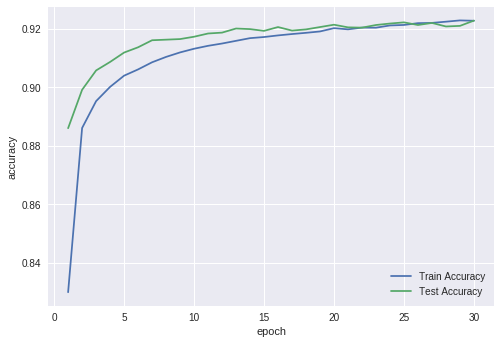

In [22]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 10
epochs = 30

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = (x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_test = (x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Lenet-5 model
model = Sequential()
#Layer 1

model.add(Dense(units = 10, activation = 'softmax'))

lear_rate = 0.05

sgd = keras.optimizers.SGD(lr=lear_rate)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=sgd,
              metrics=['accuracy'])

History = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(score)
print(History.history)

plotaccuracy = plt.plot(range(1,31),History.history['acc'],range(1,31),History.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(('Train Accuracy','Test Accuracy'))
plt.show(plotaccuracy)